In [1]:
import pandas as pd
import re
import sys
sys.path.append('/Users/Hannah/Documents/PythonProjects/atus-analysis/atus_analysis')
from data_analysis import *
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
print(amt_leisure_time_by_age())

(7.3016452733976838, 3.9399426598089073, 4.0832551717906513)


Checking methods against ATUS conclusions: <br />
People ages 25-24 spend 4.1 hours on leisure activities<br />
People ages 35-44 spend 4 hours on leisure activities<br />
People age 75 and above spend 7.3 hours on leisure activities<br />

In [5]:
result = corr_sports_school()
new_result = result.ix[1:]

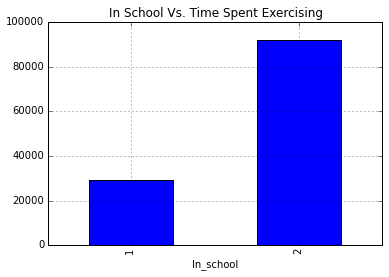

In [6]:
new_result.plot(kind='bar', title='In School Vs. Time Spent Exercising')

People who are not in school spend more time exercising.

Correlations:<br />
Taking classes and age --> -0.216473<br />
Relaxing & thinking and age --> 0.111234<br />

In [8]:
monthly_data = avg_hours_tv_per_month()

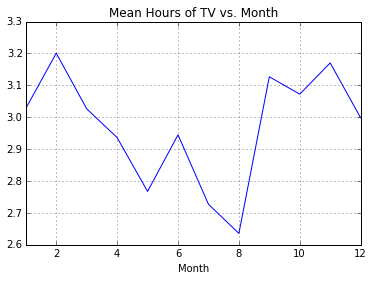

In [9]:
monthly_data.plot(title='Mean Hours of TV vs. Month')

As expected, TV watching decreases during the summer months

In [10]:
print(avg_sleep_by_kid_age())

(8.6265733580559285, 8.6735150444399256, 8.6836391549060625)


This ended up not being very exciting. People with a kid younger than 2 got 8.6 hours of sleep, people with a kid got 8.67 hours and people without a kid got 8.69 hours.

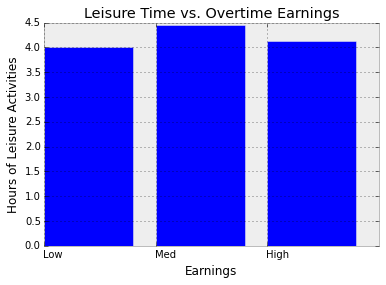

In [17]:
avgs = avg_leisure_by_overtime_earnings()
y = [avgs[0], avgs[1], avgs[2]]
x = range(3)
plt.bar(x,y)
plt.xticks(range(3), ["Low", "Med", "High"], ha='left')
plt.xlabel("Earnings")
plt.ylabel("Hours of Leisure Activities")
plt.title("Leisure Time vs. Overtime Earnings")
plt.style.use('bmh')
plt.show()

This one was also not as exciting as I had hoped...it seems these people have found a way to earn money while being leisurely. 

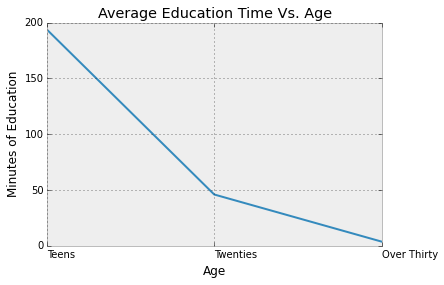

In [19]:
avgs = education_time_by_age()
y = [avgs[0], avgs[1], avgs[2]]
x = range(3)
plt.plot(x,y)
plt.xticks(range(3), ["Teens", "Twenties", "Over Thirty"], ha='left')
plt.xlabel("Age")
plt.ylabel("Minutes of Education")
plt.title("Average Education Time Vs. Age")
plt.style.use('bmh')
plt.show()

Obviously this one makes sense and turned out as expected.